## Basic example with toy data
This toy problem demonstrats the basics of classification modeling using logistic regression. For this simple example, we will use the well-known Iris data set (Fisher, 1936). We see that we have 150 records, four predictors (sepal length, sepal width, petal length, petal width), and three classes: iris setosa, iris virsicolor, and iris virginica.

In [1]:
#import required modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tools as st
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt

#read data
iris = pd.read_csv('iris.data', names=['sepal_length','sepal_width','petal_length','petal_width','class'])
#print the first five lines in iris data set
print(iris.head())
#Generate descriptive statistics for the data set and print them
print(iris.describe())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Let's explore this data set by visualizing how the three species of iris can be associated with unique combinations of their sepal and petal characteristics (their features).

Text(0, 0.5, 'petal_width')

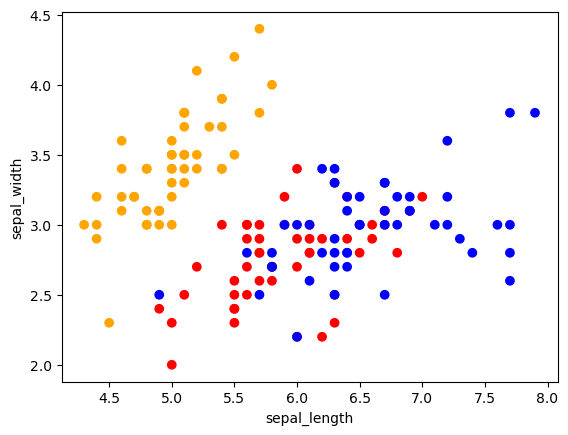

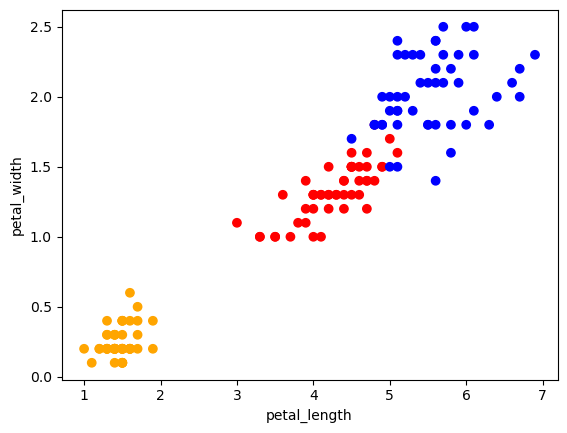

In [2]:
colors = {'Iris-setosa':'orange','Iris-versicolor':'red','Iris-virginica':'blue'}

plt.figure()
plt.scatter(iris['sepal_length'], iris['sepal_width'], c=iris['class'].map(colors))
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.figure()
plt.scatter(iris['petal_length'], iris['petal_width'], c=iris['class'].map(colors))
plt.xlabel('petal_length')
plt.ylabel('petal_width')

From the plots above, we can see that the iris virginica (blue) has a fairly unique combination of sepal and petal features that will allow us to distinquish it from the other two species. Thus, if we only have the information of the sepal and petal features, we would be able to classify an unknown iris as being an iris virginica or not. We have therefore posed a binomal classification problem, since we consider only two classes - iris virginica or "not iris virginica". For our ML model, we need to provide numerical class labels, so we will label iris virginica as "1" (positive case, or event), and the other two iris types as "0" (negative case, or non-event).

In [3]:
#replacing class in the data set for setosa and versicolor to zero and virginicia to one
iris = iris.replace('Iris-setosa', 0)
iris = iris.replace('Iris-versicolor', 0)
iris = iris.replace('Iris-virginica', 1)
iris['class'] = iris['class'].astype(int)

#print the first five lines in the new edited data set
print(iris.head())
#Generate descriptive statistics for the new data set and print them
print(iris.describe())

   sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0
       sepal_length  sepal_width  petal_length  petal_width       class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    0.333333
std        0.828066     0.433594      1.764420     0.763161    0.472984
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    0.000000
75%        6.400000     3.300000      5.100000     1.800000    1.000000
max        7.900000     4.400000      6.900000

We will now build a logistic regression classifier to identify whether an unknown iris is of the virginica species or not based on known sepal and petal features. The first step is to partition our data in a training set with which to develop the ML model, and a separate test set with which to independently assess the performance of our trained model. We set the size of the training set to 2/3 of the data (100), and the test set to 1/3 of the data (50).

In [4]:
#Load module
from sklearn.model_selection import train_test_split

# define the predictors and class
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris[['class']]

#Split data set into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#print the shape of the arrays
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 4)
(50, 4)
(100, 1)
(50, 1)


We are now ready to build a logisitic regression model for this classification task. This model has the form:

$P\left( y = 1 \lvert g(x) \right) = \dfrac{1}{1+ e^{-g(x)}}$

$g(x) = b_0 + b_1 x_1 + b_2 x_2 + ... + b_k x_k$

for $k$ predictors. In our case, we have *sepal_length* (x1), *sepal width* (x2), *petal length* (x3), and *petal width* (x4). As shown in the figure below, this simple linear classification model uses the linear input $g(x)$, transformed by a kernel function (logit function), to produce a probability between 0 and 1 of a positive event. The more positive the linear function $g(x)$ for a combination of predictors and their coefficients, the higher the predicted probability of an event (here, the species being virginica). Conversely, the more negative the function $g(x)$, the lower the probability of an event (not-virginica). The coefficients $b_0..b_k$ are fit using the labelled observations of iris species (virginica or not-virginica).

<img src="img/logit.png" alt="Title" style="width: 400px;"/>

For building this model, we use Python's statsmodels package. The data is first scaled by column so that all the features are of the same order of magnitude. This improves the performance of the model. We then train the model, using the training data partition. Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.

In [5]:
#import moldules
import statsmodels.api as sm
import statsmodels.tools as st
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#Standardize features by removing the mean and scaling to unit variance
scaler = preprocessing.StandardScaler().fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#training model
logit_model1=sm.Logit(y_train,X_train_scaled).fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.320003
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:                  0.5008
Time:                        10:48:52   Log-Likelihood:                -32.000
converged:                       True   LL-Null:                       -64.104
Covariance Type:            nonrobust   LLR p-value:                 7.415e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3173      0.782      0.406      0.685      -1.216       1.851
x2             0.9130      0.

From the summary model results we see that two of the predictors, sepal length (x1) and petal length (x3) are not statistically significant, seen from their p-values >> 0.05. In addition, the sepal width (x2) is marginally significant at p-value = 0.073. This situation is known as multi-colinearity, caused by having features that carry similar, redundant information. It can be remedied by removing some features. We will start by dropping the two least significant ones (sepal length and petal length), and refitting the model.

In [6]:
X_train_scaled = X_train_scaled[:,[1,3]]
X_test_scaled = X_test_scaled[:,[1,3]]

logit_model1=sm.Logit(y_train,X_train_scaled).fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.324486
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:                  0.4938
Time:                        10:49:37   Log-Likelihood:                -32.449
converged:                       True   LL-Null:                       -64.104
Covariance Type:            nonrobust   LLR p-value:                 1.766e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1172      0.399      2.797      0.005       0.334       1.900
x2             3.2190      0.

We see that dropping two non-significant features improved the model fit. The sepal width (now x1) is now statistically significant (p-value < 0.05), as well as the other retained predictor (petal width, now x2). Since petal width (x2) has the largest positive coefficient, it has the greatest importance in determining the iris class. We can confirm this by referring back to the data visualization above, in which the iris virginica is separated most from the other species along the dimension of petal width.

We now proceed with evaluating our model, by computing the model predictions for the unseen test partition ($\mathrm{\hat{y}})$. The predictions $\mathrm{\hat{y}}$ are the probability of the iris being of the virginica species. When comparing to the actual observed values, we see that there is a good correlation between high predicted probabilities and actual positive cases of virginica.

To make binary predictions, we have to set a probability threshold between 0 and 1 above which we call the prediction for the virginica species. A good way to assess the quality of the classifier is to consider its performance across the full range of thresholds [0,1]. For each threshold, we compute the true positive rate (TPR, or recall) and the false positive rate (FPR, or the probability of false alarms). The resulting figure is the so-called Receiver Operator Curve (ROC). The line traces for each threshold level the resulting combination of the TPR and the FPR. It is important to realize that these metrics are in opposition - achieving a high recall usually comes at the cost of having a large number of false alarms (high FPR). A perfect classifier would identify all instances of iris virginica (recall = 1.0) and never mistakenly identify a species as being virginica when it is not (FPR = 0.0). Such a perfect ROC curve would go through the top left-hand corner. Conversely, a classifier with no skill would lie on the diagonal. This performance is quantified by computing the Area Under the Curve (AUC), with a perfect classifier having an AUC = 1.0, and one with no skill having AUC = 0.5. From the results below, we can see that our classifier performs very well, with a ROC curve that runs close to the top left-hand corner, and a near-perfect AUC = 0.969.

In [ ]:
yhat = logit_model1.predict(X_test_scaled)
print('Predicted probability of iris being of the species virginica:')
print(yhat[:10])
print('\nActually occurrence of iris virginica:')
print(y_test[:10].to_numpy().reshape(10))

# Compute ROC curve and area under curve (AUC)
n_outputs = 1
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, yhat)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[4,3])
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.text(0.6, 0.15, 'AUC ='+'{0:.3f}'.format(roc_auc), fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

Having established that our classifier performs well, we can now select our probability threshold for making binary predictions. A reasonable first guess is to set it at P = 0.5. We then compute a confusion matrix, which quantifies the binary prediction in terms of the number of *true positives* (prediced virginica, actual virginica), *true negatives* (predicted non-virginica, actual non-virginica), *false positives* (predicted virginica, actual non-virginica) and *false negatives* (predicted non-virginica, actual virginica). The larger the numbers on the diagonal (true positives and true negatives), and the smaller the numbers off the diagonal (false negatives and false postives), the better. We can see that with a threshold of 0.5 our model performs fairly well in this regard. These metrics can also be used to compute the recall and precision. As with recall and the FPR, there is an adverserial relationship between recall and precision. Our choice of threshold yields perfect recall of 1.0, but at the cost of too many false positives, leading to a relatively low precision (0.615). We can thus conclude that our threshold is too low, so that cases are too easily classified as being virginica (also when they are not). A way to measure the balance of performance in terms of these two metrics is to compute their harmonic mean, known as the F1 score. Here we achieve an F1 score of 0.762.

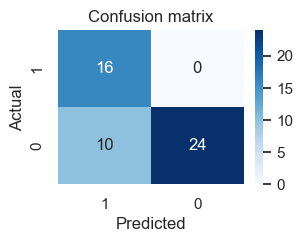

--- Logistic regression model ---
Accuracy: 0.800
Precision: 0.615
Recall: 1.000
F1_score: 0.762
FPR (Type I error): 0.294
FNR (Type II error): 0.000


In [8]:
# Set probability threshold for postitive rip event
yhat_class = yhat>0.5

acc = accuracy_score(y_test, yhat_class)
tn, fp, fn, tp = confusion_matrix(y_test, yhat_class).ravel()
precision = (tp/(tp+fp))
recall = (tp/(tp+fn))
f1_score = 2*((precision*recall)/(precision+recall))

import seaborn as sn
df_cm = pd.DataFrame([[int(tp), int(fn)],[int(fp), int(tn)]], [1,0], [1,0])
plt.figure(figsize=(3,2))
sn.set(font_scale=1.0) # for label size
sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 12}, cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion matrix")
plt.show()
matplotlib.rc_file_defaults()

# Summarize test performance
print('--- Logistic regression model ---')
print('Accuracy: %.3f' % acc)
print('Precision: %.3f' % precision )
print('Recall: %.3f' % recall )
print('F1_score: %.3f' % f1_score )
print('FPR (Type I error): %.3f' % (fp/(fp+tn)) )
print('FNR (Type II error): %.3f' % (fn/(tp+fn)) )

Since a probability threshold of 0.5 appeared to be too low, we can try to increase it to 0.85, in an attempt to reduce the number of false positives. Recomputing the binary prediction and confusion matrix, we see that the number of false positives are now indeed significantly reduced, leaving the confusion matrix more diagonally dominant. The precision increases to 0.867, and the F1 score increases to 0.839. The recall is reduced, but still at an acceptable level of 0.812. We can conclude that our classification model with the predictors *sepal width* and *petal width* and a probability threshold of 0.85 provides good performance and a good compromise between recall and precision.

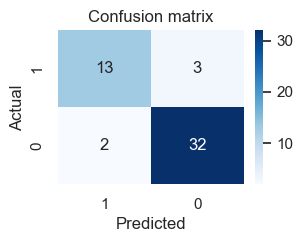

--- Logistic regression model ---
Accuracy: 0.900
Precision: 0.867
Recall: 0.812
F1_score: 0.839
FPR (Type I error): 0.059
FNR (Type II error): 0.188


In [9]:
# Set probability threshold for postitive rip event
yhat_class = yhat>0.85

acc = accuracy_score(y_test, yhat_class)
tn, fp, fn, tp = confusion_matrix(y_test, yhat_class).ravel()
precision = (tp/(tp+fp))
recall = (tp/(tp+fn))
f1_score = 2*((precision*recall)/(precision+recall))

import seaborn as sn
df_cm = pd.DataFrame([[int(tp), int(fn)],[int(fp), int(tn)]], [1,0], [1,0])
plt.figure(figsize=(3,2))
sn.set(font_scale=1.0) # for label size
sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 12}, cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion matrix")
plt.show()
matplotlib.rc_file_defaults()

# Summarize test performance
print('--- Logistic regression model ---')
print('Accuracy: %.3f' % acc)
print('Precision: %.3f' % precision )
print('Recall: %.3f' % recall )
print('F1_score: %.3f' % f1_score )
print('FPR (Type I error): %.3f' % (fp/(fp+tn)) )
print('FNR (Type II error): %.3f' % (fn/(tp+fn)) )